In [82]:
import os
import numpy as np
from scipy import constants as const 
import matplotlib.pyplot as plt
import pandas as pd
import MDAnalysis as mda
from MDAnalysis.analysis.dielectric import DielectricConstant
from scipy.stats import sem

# import mdtraj as md
import matplotlib.pyplot as plt
plt.style.use(['science', "no-latex", "nature"])

def get_volumes(path):
    """read grepped output from CHARMM log file and return list of volumes"""
    with open(path) as f:
        _ = f.readlines()
        return np.array([float(x.split()[-1]) for x in _])*1E-27 #convert to M^3
    
    
def get_density(volume, N_res, MW):
    """return the density of a pure liquid"""
    return N_res*MW / (const.N_A*volume)
    

def analyse_density(data_path):
    print(data_path)
    files = os.listdir(data_path)
    T_vs_P = {}
    for file in files:
        # print(file)
        _ = os.path.join(data_path, file, "pressure.raw")
        vols = get_volumes(_)
        density = get_density(np.mean(vols), 202, 34.02)
        densities = [get_density(_, 202, 34.02) for _ in vols]
        SD = np.std(densities)
        print(file, density, SD)
        T_vs_P[float(file[1:])] = density, SD
    return T_vs_P


def plot_density(n, r, label):
    charmm_runs = {}
    for x in range(1,n+1):
        folder = f"r{r}.{x}"
        data_path = "/home/boittier/data/param/methanol/{}/r{}.{}".format(label,r,x)
        charmm_runs[folder] = analyse_density(data_path)

    plt.plot(methanol_density["Temp. (K)"], methanol_density["Density"], "-",label="Exp")

    for x in range(1,n+1):
        charmm = charmm_runs[f"r{r}.{x}"]
        densities = [_[0] for _ in charmm.values()]
        SDs = [_[1] for _ in charmm.values()]
        # plt.plot(charmm.keys(), densities, "x-", label=f"{label} r{r}.{x}")
        plt.errorbar(charmm.keys(), densities, yerr=SDs, 
                     label=f"{label} r{r}.{x}", alpha=0.5)
        plt.scatter(charmm.keys(), densities)
    
    # plt.plot(fmdcm.keys(), fmdcm.values(), label="CHARMM r2.2")
    plt.xlabel("Temp. [K]")
    plt.ylabel("Density [kg/m$^{2}$]")
    plt.legend(bbox_to_anchor=(1., 1.0))
    # plt.xlim(240, 337)
    plt.savefig(f"{label}_{r}_density.pdf",bbox_inches="tight")



In [52]:
data_path = "/home/boittier/data/param/methanol/charmm/r2.5"
charmm = analyse_density(data_path)
data_path = "/home/boittier/data/param/methanol/charmm/r2.2"
fmdcm = analyse_density(data_path)

/home/boittier/data/param/methanol/charmm/r2.5
t240.0 899.573587772343 15.617606548874855
t260.0 876.4976449602417 17.434294430773374
t280.0 853.1938639797118 19.096204730950408
t290.0 841.3613400378201 20.78626736153553
t300.0 827.7571764452582 21.99269858787776
t310.0 817.1289827211392 22.57602468246163
t320.0 803.7871782052579 24.369195994921004
t340.0 777.164589651926 26.82559028837303
/home/boittier/data/param/methanol/charmm/r2.2
t240.0 836.5436456818993 15.314786077385333
t260.0 815.009671898803 16.863364215610606
t280.0 791.5763174297159 19.442188903972028
t290.0 779.0703777944178 20.7058865596655
t300.0 769.6795684729245 21.389718601501556
t310.0 756.5221096674284 22.734426430487375
t320.0 742.8135164270847 23.974470128676117
t340.0 714.8711094097285 27.539068031214942


/home/boittier/data/param/methanol/charmm/r2.2
t240.0 836.5436456818993
t260.0 815.009671898803
t280.0 791.6373560461592
t290.0 779.0703777944178
t300.0 769.6795684729245
t310.0 756.5221096674284
t320.0 742.8135164270847
t340.0 714.8711094097285


In [19]:
methanol_density = pd.read_csv("methanol_density.csv")
methanol_density["Temp. (K)"] = methanol_density["Temp (°C)"] + 273.15

# methanol_density_2 = pd.read_csv("methanol_density_2.csv")
# # methanol_density["Temp. (K)"] = methanol_density["Temp (°C)"] + 273.15
# methanol_density_2

methanol_density

,Temp (°C),Density,Correction Factor,Temp. (K)
0,-30.0,838.1,1.0527,243.15
1,-29.5,837.6,1.0521,243.65
2,-29.0,837.1,1.0515,244.15
3,-28.5,836.7,1.0510,244.65
4,-28.0,836.2,1.0504,245.15
...,...,...,...,...
136,38.0,774.4,0.9727,311.15
137,38.5,773.9,0.9721,311.65
138,39.0,773.4,0.9715,312.15
139,39.5,772.9,0.9709,312.65


/home/boittier/data/param/methanol/charmm/r3.1
t245.0 841.2220985347575 21.361743153187888
t270.0 813.8020186545292 25.317374668800618
t298.15 785.449966119687 27.708864723261552
t310.0 765.9846362808707 31.03445824340621
/home/boittier/data/param/methanol/charmm/r3.2
t245.0 861.1058368423453 20.471829723475516
t270.0 833.1325597971709 23.79836410327725
t298.15 801.7663110455819 29.24712146575375
t310.0 786.132306709999 31.341889156731376


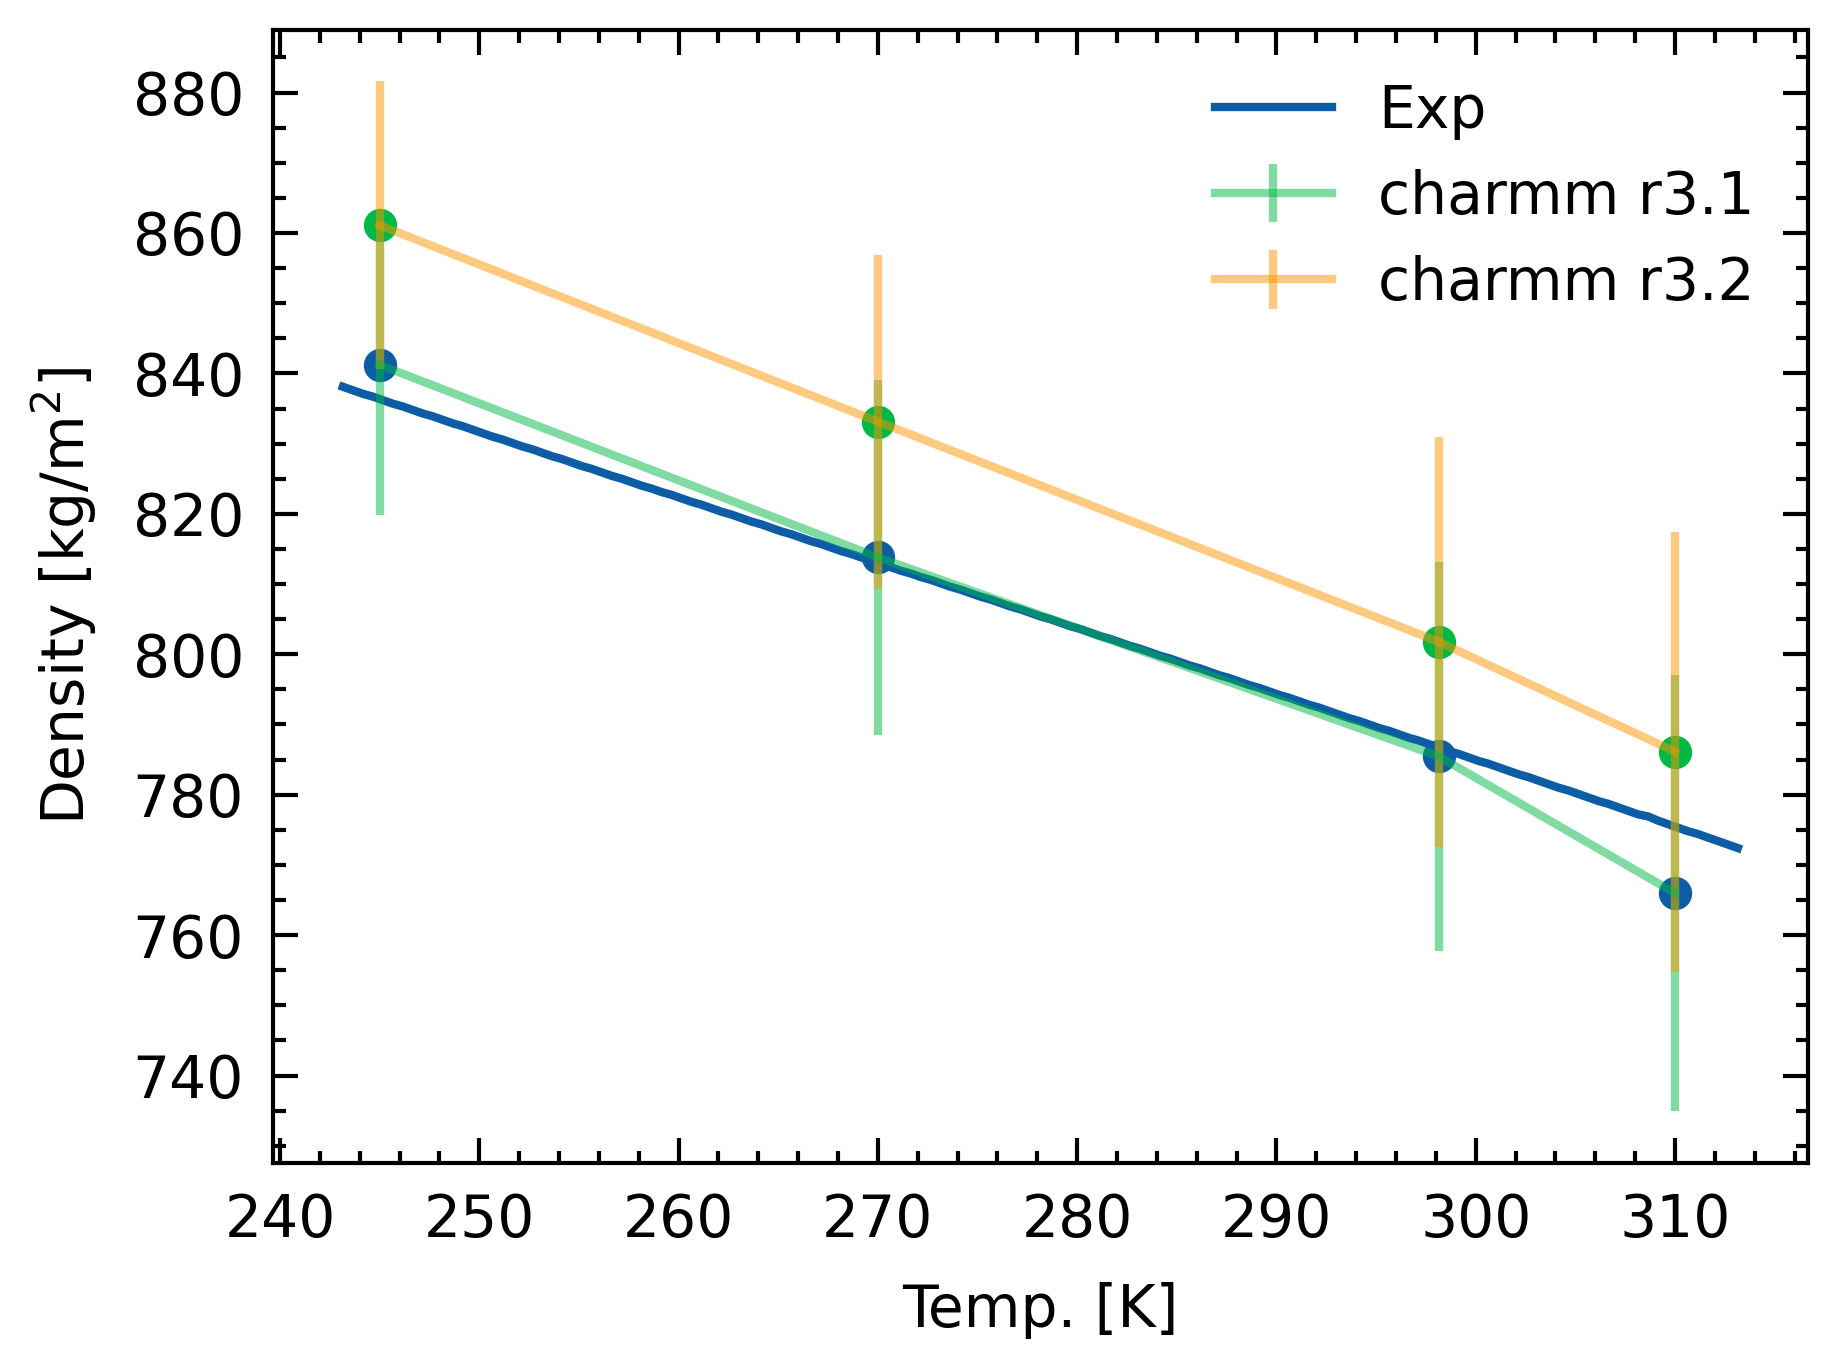

In [84]:
plot_density(2, 3, "charmm")

/home/boittier/data/param/methanol/fmdcm/r3.1
t245.0 836.9369442621141 25.11966122218563
t270.0 810.3117276237524 28.344637250913536
t298.15 772.7276503754279 34.13425282033888
t310.0 759.9587480369164 36.57149619527204
/home/boittier/data/param/methanol/fmdcm/r3.2
t245.0 856.1064279313953 26.002449405249365
t270.0 823.0379837828045 30.958371495071347
t298.15 787.8866510322626 34.894565335253915
t310.0 772.044508204318 38.25355064006746


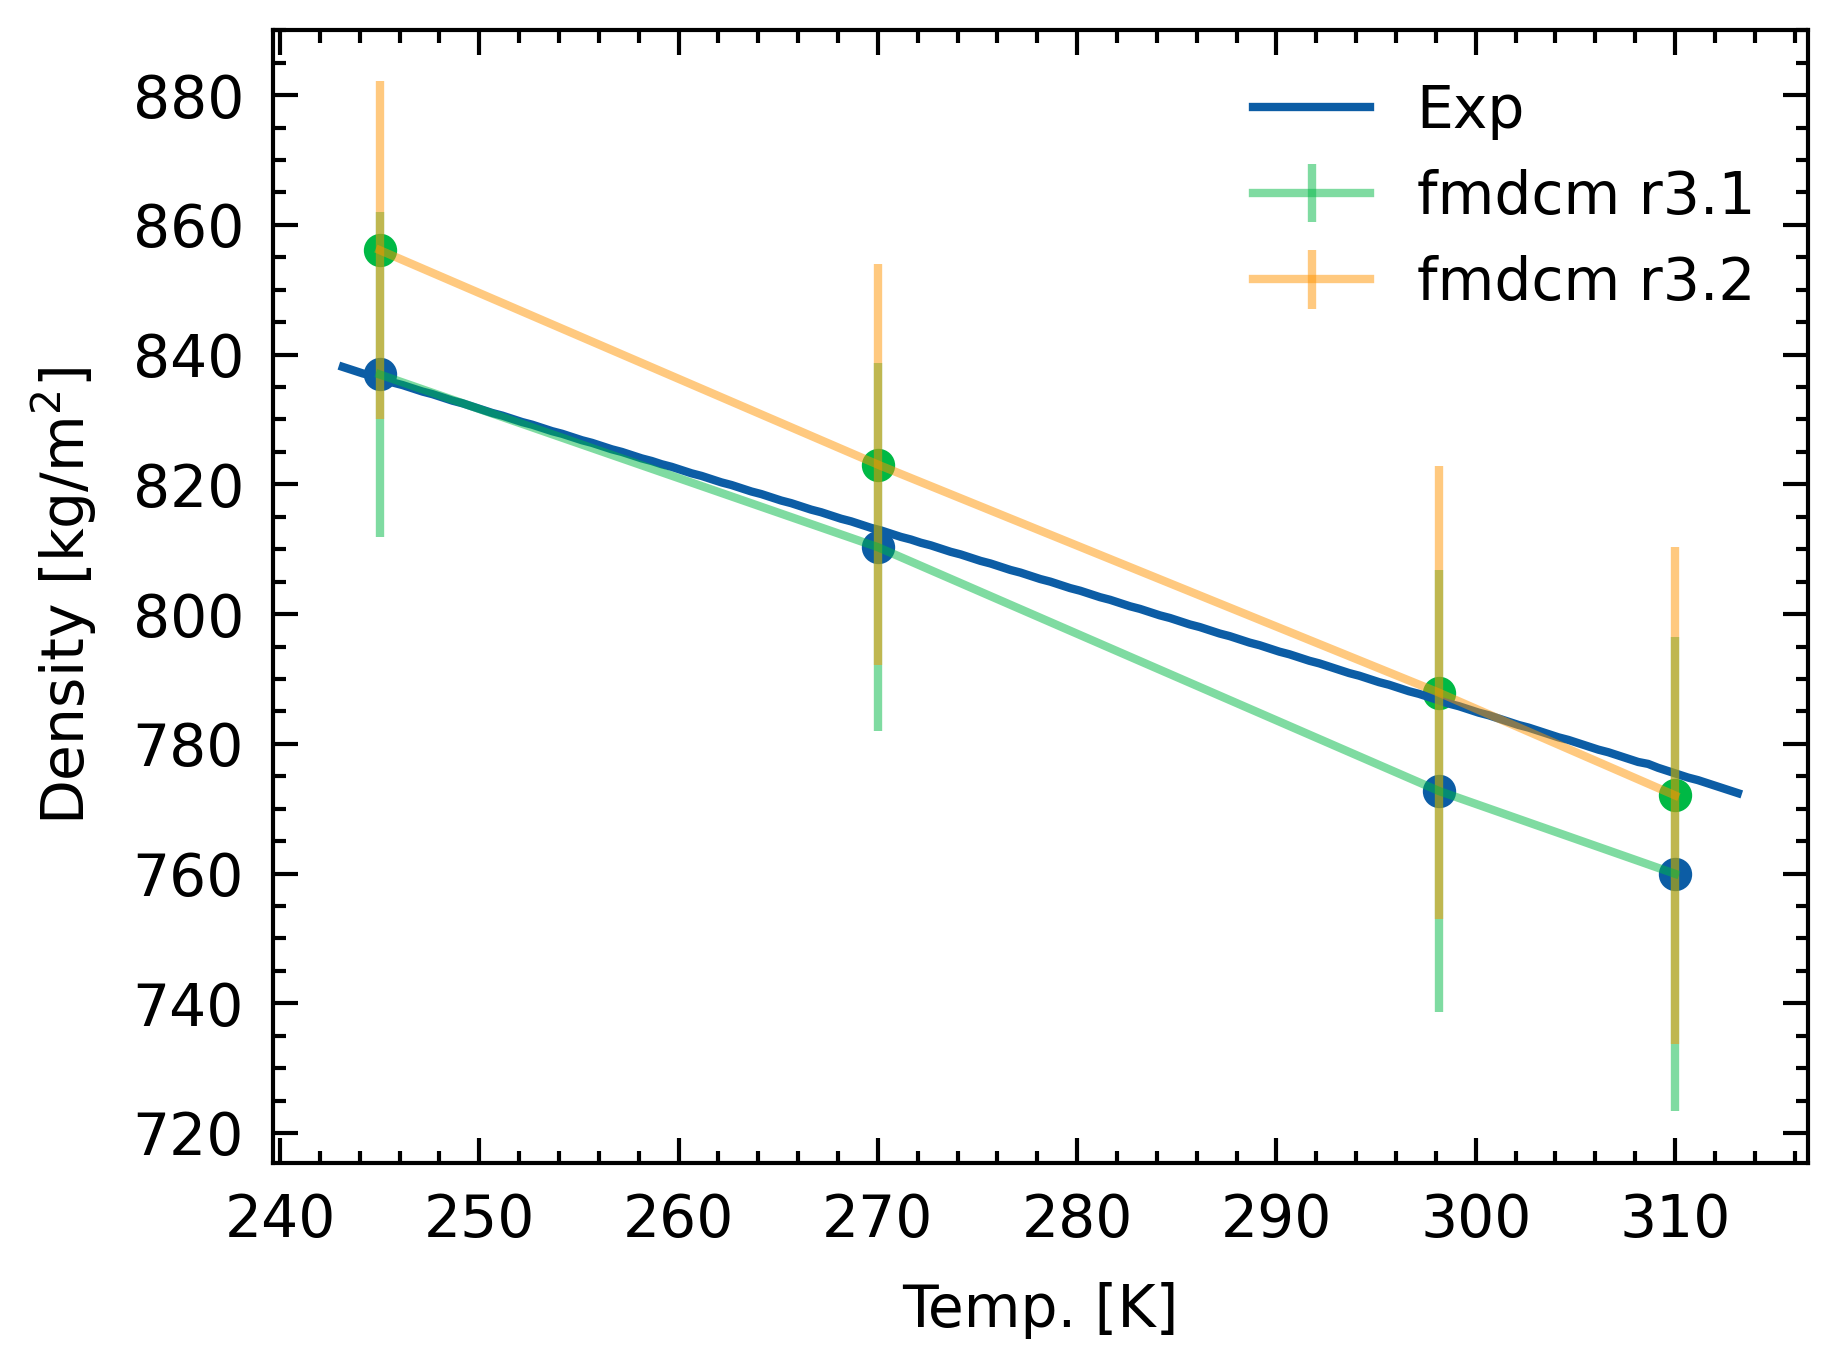

In [85]:
plot_density(2, 3, "fmdcm")

In [34]:
_ = np.array(list(charmm_runs["r2.2"].values()))
print(np.mean(_))
print(sem(_))
print(_.std())

775.7607895977502
13.820467914393628
36.56552110403305


In [80]:
_ = np.array(list(fmdcm.values()))
print(np.mean(_))
print(sem(_))
print(_.std())

795.7663335340706
1.2572872951809622
3.326469509609884
